# Training Vectorizing Words using Word2Vec model

In [58]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing as mp
import os
import pandas as pd
import cPickle
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.font_manager
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import visword2vec
from collections import Counter

core_count= mp.cpu_count()

In [55]:
def plot1( words,vectors):

    # do PCA
    #X = np.mat[vectors]
    pca = PCA(n_components=2)
    X=vectors
    pca.fit(X)
    print pca.explained_variance_ratio_
    X = pca.transform(X)
    xs = X[:, 0]
    ys = X[:, 1]

    # draw
    plt.figure(figsize=(6,6))
    plt.scatter(xs, ys, marker = 'o',s=5)
    for i, w in enumerate(words):
        plt.annotate(
            w.decode('utf-8', 'ignore'),
            xy = (xs[i], ys[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top')

    plt.show()

# Training word2vec model

In [4]:
if os.path.isfile('../DataFiles/trained_vec.bin'):
    print 'The output already exists!'
else:
    train_file = open('../DataFiles/all_reviews_sentences.txt')
    sentences= []
    for line in train_file:
        sentences.append(line.lower().replace('.','').replace('-','').split())

    model = gensim.models.Word2Vec(sentences, min_count=10)
    model = gensim.models.Word2Vec(sentences, size=300,workers=core_count)

    model.save('../DataFiles/trained_vec.bin')

The output already exists!


# Loading the model, 
## word similarity

In [4]:
import gensim
model = gensim.models.Word2Vec.load('../DataFiles/trained_vec.bin')

df = pd.DataFrame(model.similar_by_word('cabin',topn=10))
df.columns=[['word','similarity']]
df

2017-01-24 14:40:22,265 : INFO : loading Word2Vec object from ../DataFiles/trained_vec.bin
2017-01-24 14:40:22,669 : INFO : loading syn1neg from ../DataFiles/trained_vec.bin.syn1neg.npy with mmap=None
2017-01-24 14:40:23,532 : INFO : loading syn0 from ../DataFiles/trained_vec.bin.syn0.npy with mmap=None
2017-01-24 14:40:24,459 : INFO : setting ignored attribute syn0norm to None
2017-01-24 14:40:24,460 : INFO : setting ignored attribute cum_table to None
2017-01-24 14:40:24,461 : INFO : loaded ../DataFiles/trained_vec.bin
2017-01-24 14:40:24,625 : INFO : precomputing L2-norms of word weight vectors


,word,similarity
0,cottage,0.802360
1,bungalow,0.751224
2,guesthouse,0.747456
3,casita,0.712503
4,camper,0.686172
5,airstream,0.685671
6,studio,0.673551
7,hideaway,0.663801
8,trailer,0.660531
9,treehouse,0.657508


## Algebra equation

In [6]:
model.most_similar(positive=['host', 'woman'], negative=['man'], topn=1)

[('hostess', 0.804054856300354)]

## Matching

In [8]:
model.doesnt_match("wall towel bathroom welcome cabin".split())

'welcome'

## Similartity

In [9]:
print(model.similarity('cabin', 'inn'))
print(model.similarity('hostel', 'hotel'))

0.267094335798
0.633313943257


## Ploting word vectors in 2D using PCA

[ 0.28550961  0.220871  ]


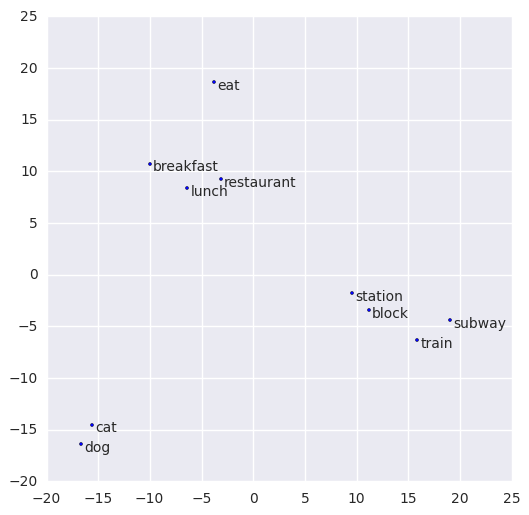

In [62]:
words = ["block","station","train","subway","dog","cat","restaurant","eat",'lunch','breakfast']
vectors=[]
for word in words:
    vectors.append(model[word])
sns.set_style("darkgrid")
plot1(words,vectors)

## Raw vector

In [10]:
model['guest'] 

array([ 1.4550308 ,  0.3940624 ,  0.96272272, -0.51513439,  0.05838453,
        0.11652667, -1.28175569, -0.84822196,  0.26959687,  0.3268182 ,
        0.21388273, -0.29465479, -0.88845855,  2.33686543, -0.36153826,
        1.60229075,  0.14986882,  0.72073853,  0.04800477,  1.66996908,
       -0.17910798,  0.87562811,  1.31664038,  0.49429235,  0.91698527,
        0.04697718,  0.22947681,  0.90869707,  0.72565889, -0.12199731,
        0.01736214, -1.58636618,  1.12740386,  0.62459791, -0.03183404,
       -0.10394789, -0.6875841 , -1.09427857,  2.89352727, -0.13843235,
        1.65345323,  1.71826708, -1.10500216,  0.30762517,  0.13389966,
       -0.4965795 ,  2.86934876,  1.85880089, -0.80497146, -0.23941553,
        0.58636546, -1.78203833, -0.55848557,  0.52863246,  0.77804691,
        0.31252599,  0.26360765, -1.10693419,  0.54123145, -0.20988232,
        0.69677615,  0.72582155,  1.05308759, -0.1398433 , -0.14856255,
       -2.5158124 ,  1.71526957, -1.04685533, -0.55286878, -0.11